#**Mount drive and download our dataset so called CIFAR10**

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# 'cs231n' folder containing the '.py', 'classifiers' and 'datasets'
# folders.
# e.g. 'cs231n/assignments/assignment1/cs231n/'
FOLDERNAME = 'cs231n/assignments/assignment1/cs231n/'

assert FOLDERNAME is not None, "[!] Enter the foldername."

%cd drive/My\ Drive
%cp -r $FOLDERNAME ../../
%cd ../../
%cd cs231n/datasets/
!bash get_datasets.sh
%cd ../../

#**Import packages**

In [2]:
import numpy as np 
import random 
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

#inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2

##CIFAR-10 Data Loading and Preprocessing

In [ ]:
cifar_dir = 'cs231n/datasets/cifar-10-batches-py'
try:
  del X_train , y_train
  del X_test  , y_test
  print('Clear previously loaded data')
except:
  pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar_dir)

print('X_train data shape : ',X_train.shape)
print('y_train data shape : ',y_train.shape)
print('X_test  data shape : ',X_test.shape)
print('y_test  data shape : ',y_test.shape)


## Show images

(32, 32, 3)


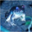

In [4]:
from google.colab.patches import cv2_imshow
#x_train_1 = X_train.reshape(50000,32*32*3)
#x_train_1 = x_train_1[15000][0:3072]
#x = x_train_1.reshape(32,32,3)
x = X_train[0]
print(x.shape)
#print(y_train[0])
#print(x.shape)
cv2_imshow(x)
#cv2.waitKey(0)

## Classes

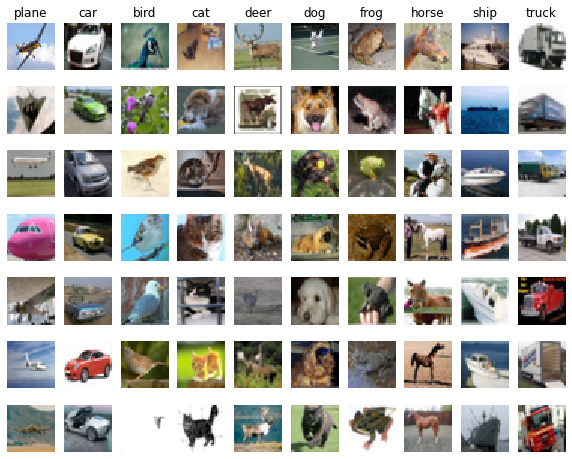

In [5]:
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
num_classes = len(classes)
samples_per_class = 7
for y , cls in enumerate(classes):
  idxs = np.flatnonzero(y_train == y)
  idxs = np.random.choice(idxs,size=samples_per_class,replace=False)
  for i , idx in enumerate(idxs):
    plot_idx = i*num_classes + y + 1
    plt.subplot(samples_per_class,num_classes,plot_idx)
    plt.imshow(X_train[idx].astype('uint8'))
    plt.axis('off')
    if i==0:
      plt.title(cls)
plt.show()

# Data Splitting [Train, Val, Test]

In [ ]:
# Split the data into train, val, and test sets. In addition we will
# create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.

num_training   = 49000
num_validation = 1000
num_test = 1000
num_dev  = 500 

#Our validation set will be num_validation points from the original
# training set.
mask  = range(num_training,num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask    = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask  = np.random.choice(num_training,num_dev,replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]


# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [ ]:
import numpy as np
x = np.arange(0,15)
mask = range(10,15)
print(x[mask])

In [ ]:
print(y_train[0])

6


##Data Preprocessing

In [ ]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train,axis=0)
#print(mean_image[:10]) #print a few of the elements
#print(mean_image.shape)
#plt.figure(figsize=(4,4))
#plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) # visualize the mean image
#plt.show()

#second: subtract the mean image from train and test data
X_train -= mean_image
X_val   -= mean_image
X_test  -= mean_image
X_dev   -= mean_image

# third: append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W




###**Add Bias to X_i input image 1x3072 resize to 1x3073**

In [ ]:
X_train = X_train.reshape(X_train.shape[0],32*32*3)   ###   +1 for bias
X_val   = X_val.reshape(X_val.shape[0],32*32*3)
X_test  = X_test.reshape(X_test.shape[0],32*32*3)
X_dev   = X_dev.reshape(X_dev.shape[0],32*32*3)

In [ ]:
X_train = np.hstack((X_train,np.ones((X_train.shape[0],1))))
print(X_train.shape)
print(np.ones((X_train.shape[0],1)).shape)

##**Data reshaping**

In [ ]:
X_train = np.hstack((X_train,np.ones((X_train.shape[0],1))))
X_val   = np.hstack((X_val,np.ones((X_val.shape[0],1))))
X_test  = np.hstack((X_test,np.ones((X_test.shape[0],1))))
X_dev   = np.hstack((X_dev,np.ones((X_dev.shape[0],1))))

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('Dev data shape: ', X_dev.shape)
print('Dev labels shape: ', y_dev.shape)

In [ ]:
#X_train = np.hstack((X_train,np.ones((X_train.shape[0],1),dtype=np.float64)))

hh = np.array([[2,3,4],[2,3,4],[2,3,4],[2,3,4]])
pp = np.hstack((hh,np.ones((hh.shape[0],1))))
print(hh.shape)
print(pp.shape)

(4, 3)
(4, 4)


In [ ]:
W = np.random.randn(3073,10)*0.01

In [ ]:
def svm_loss_vectorized(X, y, W, reg):
  loss = 0.0
  dW = np.zeros(W.shape) # initialize the gradient as zero
  num_train = X.shape[0]
  scores = X.dot(W)
  yi_scores = scores[np.arange(scores.shape[0]),y] # http://stackoverflow.com/a/23435843/459241 
  margins = np.maximum(0, scores - np.matrix(yi_scores).T + 1)
  margins[np.arange(num_train),y] = 0
  loss = np.mean(np.sum(margins, axis=1))
  loss += 0.5 * reg * np.sum(W * W)
  binary = margins
  binary[margins > 0] = 1
  row_sum = np.sum(binary, axis=1)
  binary[np.arange(num_train), y] = -row_sum.T
  dW = np.dot(X.T, binary)

  # Average
  dW /= num_train

  # Regularize
  dW += reg*W
  return loss, dW

In [ ]:
def update_weights(X,y,W,reg,rate):
  loss , dW = svm_loss_vectorized(X, y, W, reg)
  W -= rate*dW
  return loss, W

In [ ]:
def training(X, y, W, reg, iters, rate=1e-3):
  lost_history = []
  for i in range(iters):
    loss, W = update_weights(X,y,W,reg,rate)
    lost_history.append(loss)
    if i%5==0:
            print("iter={:3d}    cost={:.5f}".format(i,loss))  
  return W

In [ ]:
W = np.random.randn(3073,10)*0.0001
W = training(X_test,y_test,W,iters=100,rate=0.1)

In [ ]:
class LinearClassifier(object):
  np.array([[1,2,3],[5,6,9],[2,5,8]])

  def __init__(self):
    self.W = None

  def train(self, X, y, reg=1e-5, rate=1e-3, num_iters=100, batch_size=200, verbose=False):
    loss_history = []
    num_train , dim = X.shape
    num_class = max(y) + 1
    if self.W == None:
      self.W = np.random.randn(dim,num_class)*0.0001

    for it in range(num_iters):
      mask = np.random.choice(np.arange(num_train), size=batch_size, replace=False)
      X_batch = X[mask]
      y_batch = y[mask]
      loss, self.W = self.update_weights(X, y, reg, rate) 
      loss_history.append(loss)
      if verbose and (it%100 == 0):
          print("iter={:3d}   cost={:.5}".format(i,loss))

    return loss_history

  def predict(self,X):
    scores = X.dot(self.W)
    y_pred = np.matrix(np.argmax(scores,axis=1)).T
    return y_pred

  def loss(self, X_batch, y_batch, reg):
    loss = 0.0
    dW = np.zeros(self.W.shape)
    num_train = X_batch.shape[0]
    scores = X_batch.dot(self.W)
    yi_scores = scores[np.arange(scores.shape[0]),y_batch]
    margins = np.maximum(0, scores - np.matrix(yi_scores).T + 1)
    margins[np.arange(num_train),y_batch] = 0
    loss = np.mean(np.sum(margins, axis=1))
    loss += 0.5 * reg * np.sum(self.W * self.W)
    binary = margins
    binary[margins > 0] = 1
    row_sum = np.sum(binary, axis=1)
    binary[np.arange(num_train), y_batch] = -row_sum.T
    dW = np.dot(X_batch.T, binary)

    # Average
    dW /= num_train

    # Regularize
    dW += reg*self.W
    return loss, dW
  
  def update_weights(self, X_batch, y_batch, reg, rate):
    lost, dW = self.loss(X_batch, y_batch, reg)
    #TODO lost.history
    self.W -= rate*dW
    return lost, self.W



nn = LinearClassifier()
loss_h = nn.train(X_train, y_train, reg=1e-5, rate=1e-3, num_iters=1000, batch_size=200, verbose=True)



















##**Single Loss**

In [ ]:
def loss(x,y,W):                                   # bias (b)   removed
  delta = 0.001
  scores  = W.dot(x)
  margins = np.maximum(0, scores - scores[y] + delta)
  margins[y] = 0
  lost = np.sum(margins)
  return lost

# EVALUATED TRUE

##**Average Loss**

In [ ]:
def gLoss(X,y,W):
  x_len = X.shape[0]
  lost  = 0.0
  for i in range(x_len):
    lost += loss(X[i],y[i],W)
  return lost/x_len

##**Loss_b    derivate**

In [ ]:
######## Bias (b) added to X_i
print(y_dev[4])

1


##**Loss_w    derivate**

In [ ]:
def dLoss_w(x,y,W):
  delta = 1.0
  scores  = W.dot(x)
  margins = scores - scores[y] + delta
  margins[y] = 0
  dLoss  = -np.count_nonzero(margins>0)*x
  margins[np.where(margins>0)] = 1 
  # margins[np.where(margins<0)] = 0
  w_num = W.shape[0]
  for i in range(w_num):
    W[i] = x*margins[i]                       #W[i]*margins[i]
  W[y] = dLoss
  return W

##**Loss from stackOverFlow**

In [ ]:
bb = np.array([[1,2,3],[1,-2,-4]])
bb[bb>0] = 1
print(bb,'\n\n')

gg = np.array([[1,2,3],[1,-2,-4]])
bin = gg
bin[gg>0] = 1
print(bin,'\n\n')

##**Update Weights**

In [ ]:
def update_weights(X,y,W,rate):
  num_x = X.shape[0]
  wD = np.zeros((10,3073))
  for i in range(num_x):
    wD += dLoss_w(X[i],y[i],W)
  W -= rate*wD/num_x
  return W

##**Training**

In [ ]:
def training(X,y,W,iters,rate=1e-3):
  lost_history = []
  for i in range(iters):
    W = update_weights(X,y,W,rate)
    lost = gLoss(X,y,W)
    lost_history.append(lost)
    if i%5==0:
            print("iter={:3d}    cost={:.5f}".format(i,lost))  
  return W

In [ ]:
W = np.random.randn(10,3073)*0.0001
W = training(X_test,y_test,W,iters=100,rate=0.1)

##**Code Test**

#**Linear Classifier**

In [ ]:

class LinearClassifier(object):
  def __init__(self):
    #self.W = None
    pass

  def loss(self,x,y,W,b):
    scores  = x.dot(W) + b
    margins = np.maximum(0, scores - scores[y])
    margins[y] = 0
    lost = np.sum(margins)
    return lost
   
  def gLoss(self,X_dev,y_dev,W,b):
    x_len = X_dev.shape[0]
    lost  = 0.0
    for i in range(x_len):
      lost += self.loss(X_dev[i],y_dev[i],W,b)
    return lost/x_len

  def dLoss_b(self,x,y,W,b):
    scores  = x.dot(W) + b
    margins = scores - scores[y] + b
    margins[np.where(margins>0)] = 1 
    margins[np.where(margins<0)] = 0
    b = margins 
    return b



  def dLoss_w(self,x,y,W,b):
    scores  = x.dot(W) + b
    margins = scores - scores[y] + b
    margins[y] = -1
    dLoss  = -np.count_nonzero(margins>0)*x
    margins[np.where(margins>0)] = 1 
    margins[np.where(margins<0)] = 0
    w_num = W.shape[0]
    for i in range(w_num):
      W[i] *= margins[i]
    W[y] = dLoss
    return W
  
  def update_weights(self,X_dev,y_dev,W,b,rate):
    num_x = X_dev.shape[0]
    wD = np.zeros((10,3072))
    bD = np.zeros(10)
    for i in range(num_x):
      wD += self.dLoss_w(X_dev[i],y_dev[i],W,b)
      wB += self.dLoss_b(X_dev[i],y_dev[i],W,b)
    
    W -= rate*wD/num_x
    b -= rate*wB/num_x
    return W,b


  def training(self,X_dev,y_dev,W,b,iters,rate=1e-3):
    lost_history = []
    for i in range(iters):
      W,b = self.update_weights(X_dev,y_dev,W,b,rate)
      lost = self.gLoss(X_dev,y_dev,W,b)
      lost_history.append(lost)
    for i in range(iters):
      print('iters = {:d}    lost = {:.5f}'.format(i,lost_history[i]))

#data preprocessing
W = np.zeros((10,3072))
b = np.zeros(10)
svm = LinearClassifier()
svm.training(X_dev,y_dev,W,b,iters=10,rate=1e-3)

